In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("data.csv")
full_data = df.drop(["liked"], axis=1)

# xtrain, xtest, ytrain, ytest = train_test_split(full_data, df["liked"], test_size=.20)
xtrain = pd.read_csv('xtrain.csv').iloc[: , 1:]
xtest = pd.read_csv('xtest.csv').iloc[: , 1:]
ytrain = pd.read_csv('ytrain.csv').iloc[: , 1:]
ytest = pd.read_csv('ytest.csv').iloc[: , 1:]

In [3]:
bestSetting = [0,0,0]
for i in range(1,11):
    for j in range(1, full_data.shape[1]):
        dt = DecisionTreeClassifier(max_depth=i, max_features=j, criterion="entropy")
        dt.fit(xtrain,ytrain)
        acc = sum(cross_val_score(dt, xtrain, ytrain, cv=5))/5
        if(acc > bestSetting[2]):
            bestSetting = [i,j,acc]
print("best values:", bestSetting)


best values: [5, 8, 0.9034274193548388]


In [4]:
tuned_dtree = DecisionTreeClassifier(max_depth=bestSetting[0], max_features=bestSetting[1], criterion="entropy")
tuned_dtree.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=8)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

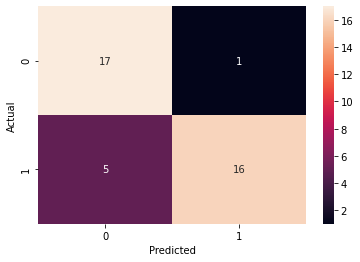

In [5]:
pred = tuned_dtree.predict(xtest)
## Build a nice Seaborn confusion matrix
data = {'y_Predicted': pred,
        'y_Actual':    np.array(ytest).ravel()
        }

df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)

In [6]:
ylist = np.array(ytest).ravel()
dfA = len(ylist)
for y in range(0,len(ylist)):
    if pred[y] != ylist[y]:
        dfA -= 1
print("Decision tree accuracy: ", dfA/len(ylist) * 100, "%")

Decision tree accuracy:  84.61538461538461 %


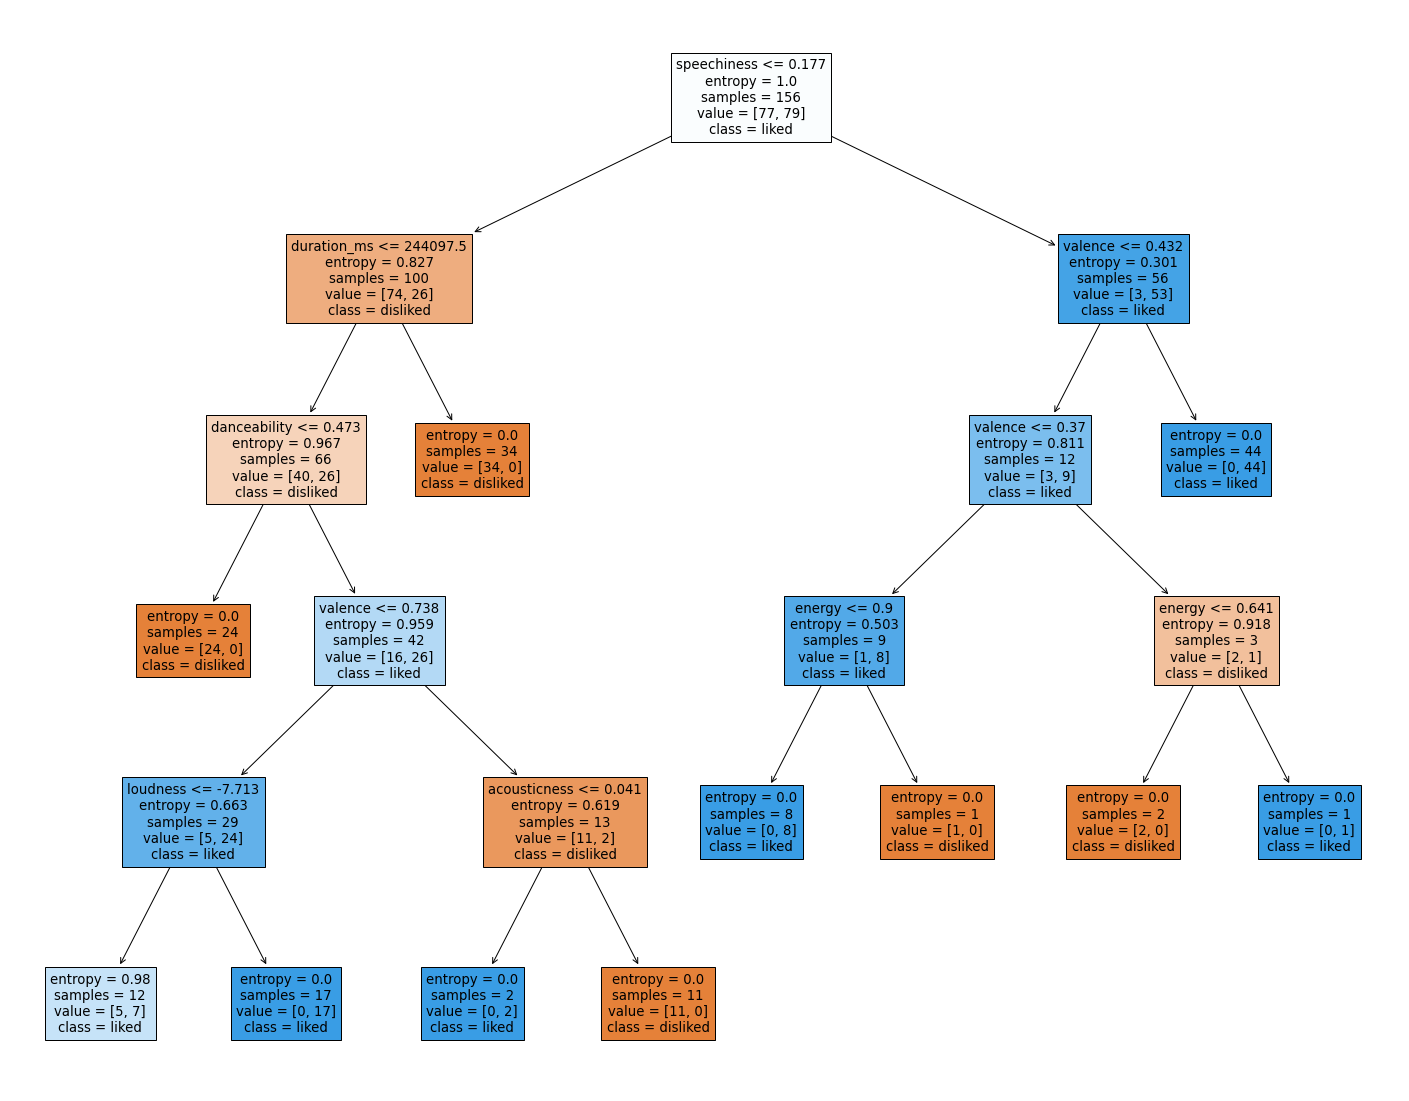

In [7]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
blah = tree.plot_tree(tuned_dtree, 
                feature_names=xtrain.columns,
                      class_names=['disliked', 'liked'],
                   filled=True)
fig.savefig("spotify_tuned_dt.png")